# U.S. Medical Insurance Costs

Our dataset contains 1338 rows of information about U.S. medical insurance costs of patients. This dataset is provided as insurance.csv file that has different type of attributs as sex, age, bmi, children, smoker, region, and charges. 

## Goals

Our goal is to able to:
- to calculate the average age of the patients
- to globally calculate average insurance cost in the insurance data.
- to calculate the portion of males versus females in the insurance data.
- to have an insight on the cheapest and the most expensive insurance costs.
- to define a confidence interval of 95% for the insurance charges.
- to buid a dictionary with all patients information

In [1]:
import csv
import math
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Actions

The first action we are going to take in order to achieve our goal is to load the data using the helper function of loading csv file provided by Codecademy. Since the data in the insurance.csv file is organized in a tabular way where columns have same number of rows, each column header will represent an attribut variable that will be defined as a list variable so that we can import information in the form of python lists. 

In [2]:
# So, let's define empty variable lists
ages = []
sexes = []
bmis = []
num_children = []
smoker_statuses = []
regions = []
insurance_charges = []

# Then, using the  following helper function to load csv data
def load_list_data(lst, csv_file, column_name):
    # open csv file
    with open(csv_file) as csv_info:
        # read the data from the csv file
        csv_dict = csv.DictReader(csv_info)
        # loop through the data in each row of the csv 
        for row in csv_dict:
            # add the data from each row to a list
            lst.append(row[column_name])
        # return the list
        return lst

In [3]:
# As a result, we can load and save all the insurance_costs data via python vriablelists that can be used for further tasks.

load_list_data(ages, 'insurance.csv', 'age')
load_list_data(sexes, 'insurance.csv', 'sex')
load_list_data(bmis, 'insurance.csv', 'bmi')
load_list_data(num_children, 'insurance.csv', 'children')
load_list_data(smoker_statuses, 'insurance.csv', 'smoker')
load_list_data(regions, 'insurance.csv', 'region')
load_list_data(insurance_charges, 'insurance.csv', 'charges')

['16884.924',
 '1725.5523',
 '4449.462',
 '21984.47061',
 '3866.8552',
 '3756.6216',
 '8240.5896',
 '7281.5056',
 '6406.4107',
 '28923.13692',
 '2721.3208',
 '27808.7251',
 '1826.843',
 '11090.7178',
 '39611.7577',
 '1837.237',
 '10797.3362',
 '2395.17155',
 '10602.385',
 '36837.467',
 '13228.84695',
 '4149.736',
 '1137.011',
 '37701.8768',
 '6203.90175',
 '14001.1338',
 '14451.83515',
 '12268.63225',
 '2775.19215',
 '38711',
 '35585.576',
 '2198.18985',
 '4687.797',
 '13770.0979',
 '51194.55914',
 '1625.43375',
 '15612.19335',
 '2302.3',
 '39774.2763',
 '48173.361',
 '3046.062',
 '4949.7587',
 '6272.4772',
 '6313.759',
 '6079.6715',
 '20630.28351',
 '3393.35635',
 '3556.9223',
 '12629.8967',
 '38709.176',
 '2211.13075',
 '3579.8287',
 '23568.272',
 '37742.5757',
 '8059.6791',
 '47496.49445',
 '13607.36875',
 '34303.1672',
 '23244.7902',
 '5989.52365',
 '8606.2174',
 '4504.6624',
 '30166.61817',
 '4133.64165',
 '14711.7438',
 '1743.214',
 '14235.072',
 '6389.37785',
 '5920.1041',
 '176

## Building out analysis functions or class methods

To achieve our goals, we will rely on a PatientData class with methods such as
- calculate_average_ages(): method that calculates the average ages of patients in insurance.csv
- calculate_percentage_sexes(): method that calculates the portion of males versus females in insurance.csv
- get_patient_distinct_regions(): method to locate distinct region patients are from
- calculate_average_medical_costs(): method to get the average yearly medical costs for each patient in insurance.csv
- insurance_charges_statistics(): method to get the mean, variance and standard deviation of the insurance data.
- patient_profile_dictionary(): method to define the profile of each patient.


In [4]:
class PatientData:
    z_value = 1.960
    
    def __init__(self, ages, sexes, bmis, num_children, smoker_statuses, regions, insurance_charges):
        self.ages = ages
        self.sexes = sexes
        self.bmis = bmis
        self.num_children = num_children
        self.smoker_statuses = smoker_statuses
        self.regions = regions
        self.insurance_charges = insurance_charges
        
    def calculate_average_ages(self):
        total_age = 0
        avg_age = 0
        for age in self.ages:
            total_age += int(age)
        avg_age = round(total_age / len(ages), 2) 
        return "The average age of the patients is {} years.".format(avg_age)
    
    def calculate_percentage_sexes(self):
        num_female = 0
        num_male = 0
        male_percentage = 0
        female_percentage = 0
        for sex in self.sexes:
            if sex == "female":
                num_female += float(1) 
            else:
                num_male += float(1)
        male_percentage = 100 * num_male/ (num_female + num_male)
        female_percentage = 100 * num_female/ (num_female + num_male)
        print ("Percentage of male patients: " + str(round(male_percentage, 2)) +"%" +"\n"+ "Percentage of female patients: " + str(round(female_percentage, 2)) + "%.") 
    
    def get_distinct_patient_regions(self):
        distinct_regions = []
        for region in self.regions:
            if region not in distinct_regions:
                distinct_regions.append(region)
        return "Distinct regions all the patients are from: {}.".format(distinct_regions)
    
    def calculate_average_medical_costs(self):
        total_medical_cost = 0
        average_medical_cost = 0
        for charge in self.insurance_charges:
            total_medical_cost += float(charge)
        average_medical_cost = round( total_medical_cost / len(self.insurance_charges), 2)
        return "The average yearly medical costs for each patient is {} dollars.".format(average_medical_cost)
    
    # calculate the maximal insurance charge 
    def calculate_higuest_charge(self):
        max_cost = 0
        for charge in self.insurance_charges:
            if max_cost < float(charge):
                max_cost = float(charge)
        return round(max_cost, 2)
    
    # calculate the minimal insurance charge 
    def calculate_lowest_charge(self):
        min_cost = float(self.insurance_charges[0])
        for j in range(len(self.insurance_charges)):
            if   (min_cost > float(self.insurance_charges[j])) :
                min_cost = float(self.insurance_charges[j])
        return round(min_cost, 2)
    
    def range_insurance_charges(self):
        max_cost = min_cost = float(self.insurance_charges[0])
        # calculate the minimal insurance charge 
        for j in range(len(self.insurance_charges)):
            if   (min_cost > float(self.insurance_charges[j])) :
                min_cost = float(self.insurance_charges[j])
                
         # calculate the maximal insurance charge       
        for j in range(len(self.insurance_charges)):
            if   (max_cost < float(self.insurance_charges[j])) :
                max_cost = float(self.insurance_charges[j])
                
        return round(max_cost - min_cost, 2)
    
    def insurance_charges_statistics(self):
        total_square_gaps = 0
        total_medical_cost = 0
        mean_charges = 0
        margin_error = 0
        variance = 0
        standard_deviation = 0
        for charge in self.insurance_charges:
            total_medical_cost += float(charge)
            mean_charges = round( total_medical_cost / len(self.insurance_charges), 2)
        for charge in self.insurance_charges:
            total_square_gaps += (float(charge) - mean_charges)**2
        
        variance = round(total_square_gaps, 2)
        standard_deviation = round(math.sqrt(total_square_gaps/len(self.insurance_charges)),2)
        margin_error = round(self.z_value * standard_deviation / math.sqrt(len(self.insurance_charges)), 2)
        
        print ("Mean of Insurance Charges: " + str(mean_charges) + "\n" + "Variance of Insurance Charges: " 
               + str(variance) + "\n" + "Standard Deviation of Insurance Charges: " + str(standard_deviation) 
               + " \n" + "And the Margin Error for a conficence interval of 95% is " + str(margin_error) + ".")
    
    
    def patient_profile_dictionary(self):
        # initialize empty dictionary
        patient_info = {}
        # set age, sex, bmi, number of children, smoker and charge as keys tied with the  their values

        patient_info["Age"] = [ int(age) for age in self.ages]
        patient_info["Sex"] = self.sexes
        patient_info["BMI"] = self.bmis
        patient_info["NumberOfChildren"] = self.num_children
        patient_info["Smoker"] = self.smoker_statuses
        patient_info["Region"] = self.regions
        patient_info["Charge"] = self.insurance_charges
        return patient_info
    
    

    @staticmethod
    
    def mean(x : list):
        sum_x_values = 0.00
        for i in range(len(x)):
            sum_x_values += float(x[i])
            
        return(round(sum_x_values / len(x), 2))
    
    @staticmethod
    def std(x : list):
        mu = patient_data.mean(x)
        x2 = [(float(j)-mu) ** 2 for j in x]   
        m = round(sum(x2) / len(x2), 2)
    
        return(round(math.sqrt(m), 2))
    
    @staticmethod
    def margin_error(x : list):
        s = patient_data.std(x)
        z = patient_data.z_value
        me = round(z * s /math.sqrt(len(x)), 2)
                   
        return(me)
    
   

## Testing our class and its methods

We will define patient_data an instance of PatientData to test our class methods.

In [5]:
patient_data = PatientData(ages, sexes, bmis, num_children, smoker_statuses, regions, insurance_charges)

In [6]:
patient_data.calculate_average_ages()

'The average age of the patients is 39.21 years.'

In [7]:
patient_data.calculate_percentage_sexes()

Percentage of male patients: 50.52%
Percentage of female patients: 49.48%.


In [8]:
patient_data.get_distinct_patient_regions()

"Distinct regions all the patients are from: ['southwest', 'southeast', 'northwest', 'northeast']."

In [9]:
patient_data.calculate_average_medical_costs()

'The average yearly medical costs for each patient is 13270.42 dollars.'

In [10]:
patient_data.patient_profile_dictionary()

{'Age': [19,
  18,
  28,
  33,
  32,
  31,
  46,
  37,
  37,
  60,
  25,
  62,
  23,
  56,
  27,
  19,
  52,
  23,
  56,
  30,
  60,
  30,
  18,
  34,
  37,
  59,
  63,
  55,
  23,
  31,
  22,
  18,
  19,
  63,
  28,
  19,
  62,
  26,
  35,
  60,
  24,
  31,
  41,
  37,
  38,
  55,
  18,
  28,
  60,
  36,
  18,
  21,
  48,
  36,
  40,
  58,
  58,
  18,
  53,
  34,
  43,
  25,
  64,
  28,
  20,
  19,
  61,
  40,
  40,
  28,
  27,
  31,
  53,
  58,
  44,
  57,
  29,
  21,
  22,
  41,
  31,
  45,
  22,
  48,
  37,
  45,
  57,
  56,
  46,
  55,
  21,
  53,
  59,
  35,
  64,
  28,
  54,
  55,
  56,
  38,
  41,
  30,
  18,
  61,
  34,
  20,
  19,
  26,
  29,
  63,
  54,
  55,
  37,
  21,
  52,
  60,
  58,
  29,
  49,
  37,
  44,
  18,
  20,
  44,
  47,
  26,
  19,
  52,
  32,
  38,
  59,
  61,
  53,
  19,
  20,
  22,
  19,
  22,
  54,
  22,
  34,
  26,
  34,
  29,
  30,
  29,
  46,
  51,
  53,
  19,
  35,
  48,
  32,
  42,
  40,
  44,
  48,
  18,
  30,
  50,
  42,
  18,
  54,
  32,
  37,
  4

In [11]:
patient_data.calculate_higuest_charge()

63770.43

In [12]:
patient_data.calculate_lowest_charge()

1121.87

In [13]:
patient_data.range_insurance_charges()

62648.55

In [14]:
patient_data.insurance_charges_statistics()

Mean of Insurance Charges: 13270.42
Variance of Insurance Charges: 196074221568.37
Standard Deviation of Insurance Charges: 12105.48 
And the Margin Error for a conficence interval of 95% is 648.65.


Now, using the Z value of the corresponding [confidence interval](https://www.mathsisfun.com/data/confidence-interval.html) we want, we could calculate a margin error. Let's say we want a confidence interval of 95%, it's Z value is ```1.960```. Therefore, the margin error would be: ```648.65``` and 
```Confidence Interval of 95% = [12,621.77  13,919.07] ```

In [15]:
patient_data.mean(insurance_charges)

13270.42

In [16]:
patient_data.std(insurance_charges)

12105.48

In [17]:
patient_data.margin_error(insurance_charges)

648.65

In [18]:
# Initialize a variabe that will find the age category of patient who has the maximum expenditure
age_category_of_patient_with_maximum_insurance_charge = []

# Initialize a variabe that will give all the information of patient who has the maximum expenditure.
profile_of_patient_with_maximum_insurance_charge = {'Age': [], 'Sex': [], 'BMI': [], 'NumberOfChildren': [], 'Smoker': [], 'Region': [], 'Charge': [] }

# find the age category of patient who has the maximum expenditure
for i in range(len(patient_data.patient_profile_dictionary()['Charge'])):
    if round(eval(patient_data.patient_profile_dictionary()['Charge'][i]), 2) ==  patient_data.calculate_higuest_charge():
        age_category_of_patient_with_maximum_insurance_charge.append(patient_data.patient_profile_dictionary()['Age'][i])
        # now, get all the information about the patient with maximum insurance charge.
        profile_of_patient_with_maximum_insurance_charge['Age'] = patient_data.patient_profile_dictionary()['Age'][i]
        profile_of_patient_with_maximum_insurance_charge['Sex'] = patient_data.patient_profile_dictionary()['Sex'][i]
        profile_of_patient_with_maximum_insurance_charge['BMI'] = patient_data.patient_profile_dictionary()['BMI'][i]
        profile_of_patient_with_maximum_insurance_charge['NumberOfChildren'] = patient_data.patient_profile_dictionary()['NumberOfChildren'][i]
        profile_of_patient_with_maximum_insurance_charge['Smoker'] = patient_data.patient_profile_dictionary()['Smoker'][i]
        profile_of_patient_with_maximum_insurance_charge['Region'] = patient_data.patient_profile_dictionary()['Region'][i]
        profile_of_patient_with_maximum_insurance_charge['Charge'] = patient_data.patient_profile_dictionary()['Charge'][i]
        
print("The age category  of the patient with maximum insurance charge is " + str(age_category_of_patient_with_maximum_insurance_charge))
print("All the information of the patient with  the highest insurance charge are: " + str(profile_of_patient_with_maximum_insurance_charge))

The age category  of the patient with maximum insurance charge is [54]
All the information of the patient with  the highest insurance charge are: {'Age': 54, 'Sex': 'female', 'BMI': '47.41', 'NumberOfChildren': '0', 'Smoker': 'yes', 'Region': 'southeast', 'Charge': '63770.42801'}


In [19]:
# Initialize a variabe that will find the age category of patient who has the lowest expenditure
age_category_of_patient_with_minimum_insurance_charge = []

# Initialize a variabe that will give all the information of patient who has the lowest expenditure.
profile_of_patient_with_minimum_insurance_charge = {'Age': [], 'Sex': [], 'BMI': [], 'NumberOfChildren': [], 'Smoker': [], 'Region': [], 'Charge': [] }

# find the age category of patient who has the minimum expenditure
for i in range(len(patient_data.patient_profile_dictionary()['Charge'])):
    if round(eval(patient_data.patient_profile_dictionary()['Charge'][i]), 2) ==  patient_data.calculate_lowest_charge():
        age_category_of_patient_with_minimum_insurance_charge.append(patient_data.patient_profile_dictionary()['Age'][i])
        
        # now, get all the information about the patient with minimum insurance charge.
        profile_of_patient_with_minimum_insurance_charge['Age'] = patient_data.patient_profile_dictionary()['Age'][i]
        profile_of_patient_with_minimum_insurance_charge['Sex'] = patient_data.patient_profile_dictionary()['Sex'][i]
        profile_of_patient_with_minimum_insurance_charge['BMI'] = patient_data.patient_profile_dictionary()['BMI'][i]
        profile_of_patient_with_minimum_insurance_charge['NumberOfChildren'] = patient_data.patient_profile_dictionary()['NumberOfChildren'][i]
        profile_of_patient_with_minimum_insurance_charge['Smoker'] = patient_data.patient_profile_dictionary()['Smoker'][i]
        profile_of_patient_with_minimum_insurance_charge['Region'] = patient_data.patient_profile_dictionary()['Region'][i]
        profile_of_patient_with_minimum_insurance_charge['Charge'] = patient_data.patient_profile_dictionary()['Charge'][i]
        
print("The age category  of the patient with minimum insurance charge is " + str(age_category_of_patient_with_minimum_insurance_charge))
print("All the information of the patient with the lowest insurance charge are: " + str(profile_of_patient_with_minimum_insurance_charge))

The age category  of the patient with minimum insurance charge is [18]
All the information of the patient with the lowest insurance charge are: {'Age': 18, 'Sex': 'male', 'BMI': '23.21', 'NumberOfChildren': '0', 'Smoker': 'no', 'Region': 'southeast', 'Charge': '1121.8739'}


In [20]:
# record the profile of patients who have higher insurance charges outer to the confidence interval values by region ['southwest', 'southeast', 'northwest', 'northeast']
southeast_patients_with_most_insurance_charges = {}
count_se = 0
southwest_patients_with_most_insurance_charges = {}
count_sw = 0
northeast_patients_with_most_insurance_charges = {}
count_ne = 0
northwest_patients_with_most_insurance_charges = {}
count_nw = 0
charges_mean = patient_data.mean(insurance_charges)
margin_error = patient_data.margin_error(insurance_charges)
patient_inform = {'Age': [], 'Sex': [], 'BMI': [], 'NumberOfChildren': [], 'Smoker': [], 'Region': [], 'Charge': [] }
for i in range(len(patient_data.patient_profile_dictionary()['Charge'])):
    if round(eval(patient_data.patient_profile_dictionary()['Charge'][i]), 2) > charges_mean + margin_error:
        patient_inform['Age'] = patient_data.patient_profile_dictionary()['Age'][i]
        patient_inform['Sex'] = patient_data.patient_profile_dictionary()['Sex'][i]
        patient_inform['BMI'] = patient_data.patient_profile_dictionary()['BMI'][i]
        patient_inform['NumberOfChildren'] = patient_data.patient_profile_dictionary()['NumberOfChildren'][i]
        patient_inform['Smoker'] = patient_data.patient_profile_dictionary()['Smoker'][i]
        patient_inform['Region'] = patient_data.patient_profile_dictionary()['Region'][i]
        patient_inform['Charge'] = patient_data.patient_profile_dictionary()['Charge'][i]
 
    if patient_data.patient_profile_dictionary()['Region'][i] == 'southeast':
        count_se += i
        southeast_patients_with_most_insurance_charges.update( patient_inform)
    elif patient_data.patient_profile_dictionary()['Region'][i] == 'southwest':
        count_sw += i
        southwest_patients_with_most_insurance_charges.update( patient_inform)
    elif patient_data.patient_profile_dictionary()['Region'][i] == 'northeast':
        count_ne += i
        northeast_patients_with_most_insurance_charges.update( patient_inform)
    else:
        count_nw += i
        northwest_patients_with_most_insurance_charges.update( patient_inform)
        
print("Southeast region count: " + str(count_se) + " patients with higher insurance_charges")
print("Southwest region count: " + str(count_sw) + " patients with higher insurance_charges") 
print("Northeast region count: " + str(count_ne) + " patients with higher insurance_charges")
print("Northwest region count: " + str(count_nw) + " patients with higher insurance_charges")

Southeast region count: 238060 patients with higher insurance_charges
Southwest region count: 218976 patients with higher insurance_charges
Northeast region count: 215508 patients with higher insurance_charges
Northwest region count: 221909 patients with higher insurance_charges


From our analysis, we can deduct that Southeast region has the highest number of patients: ```238060``` with higher insurance charges than the average: ``` 13270.42 dollars ```, the patient with the highest insurance charge: ``` 63770.42801 dollars ```, and the lowest  insurance charge: ``` 1121.8739 dollars ``` in the country. It is following by the Northwest region, the Southwest region, and the Northeast region respectively with ``` 221909 ```, ``` 218976```, and ``` 215508``` patients.

## Deepen our data analysis

In [21]:
df = pd.DataFrame(patient_data.patient_profile_dictionary())

print(df.head(10))

   Age     Sex     BMI NumberOfChildren Smoker     Region       Charge
0   19  female    27.9                0    yes  southwest    16884.924
1   18    male   33.77                1     no  southeast    1725.5523
2   28    male      33                3     no  southeast     4449.462
3   33    male  22.705                0     no  northwest  21984.47061
4   32    male   28.88                0     no  northwest    3866.8552
5   31  female   25.74                0     no  southeast    3756.6216
6   46  female   33.44                1     no  southeast    8240.5896
7   37  female   27.74                3     no  northwest    7281.5056
8   37    male   29.83                2     no  northeast    6406.4107
9   60  female   25.84                0     no  northwest  28923.13692


### Group by Sex, get mean, min, and max value of Age for each value of Sex.

In [22]:
# group by Sex, get mean, min, and max value of Age for each value of Sex.

age_by_sex = df.groupby('Sex').agg({'Age': ['mean', 'min', 'max']})

# rename columns
age_by_sex.columns = ['age_mean', 'age_min', 'age_max']

# reset index to get grouped columns back
age_by_sex = age_by_sex.reset_index()

print(age_by_sex)

      Sex   age_mean  age_min  age_max
0  female  39.503021       18       64
1    male  38.917160       18       64


### Group by Sex and Region, get mean, min, and max value of Age for each value of Sex.

In [23]:
# group by Sex and Region, get mean, min, and max value of Age for each value of Sex.

age_by_sex_region = df.groupby(['Sex', 'Region']).agg({'Age': ['mean', 'min', 'max']})

# rename columns
age_by_sex_region.columns = ['age_mean', 'age_min', 'age_max']

# reset index to get grouped columns back
age_by_sex_region = age_by_sex_region.reset_index()

#print(age_by_sex_region)
#
age_by_sex_region_pivot = age_by_sex_region.pivot(
    columns = 'Region',
    index = 'Sex',
    values = 'age_mean'
).reset_index()

print(age_by_sex_region_pivot)

Region     Sex  northeast  northwest  southeast  southwest
0       female  39.639752  39.591463  39.108571  39.703704
1         male  38.901840  38.795031  38.783069  39.208589


### Group by Sex and Region, get mean, min, and max value of the medical insurance cost for each value of Sex.

In [24]:
# convert Charge data type to numeric using pd
df['Charge'] = pd.to_numeric(df['Charge'])
df['BMI'] = pd.to_numeric(df['BMI'])
df['NumberOfChildren'] = pd.to_numeric(df['NumberOfChildren'])

# group by Sex and Region, get mean, min, and max value of insurance Charge for each value of Sex.
charge_by_sex_region = df.groupby(['Sex', 'Region']).agg({'Charge': ['mean', 'min', 'max']})

# rename columns
charge_by_sex_region.columns = ['charge_mean', 'charge_min', 'charge_max']

# reset index to get grouped columns back
charge_by_sex_region = charge_by_sex_region.reset_index()

print(charge_by_sex_region)

      Sex     Region   charge_mean  charge_min   charge_max
0  female  northeast  12953.203151  2196.47320  58571.07448
1  female  northwest  12479.870397  2117.33885  55135.40209
2  female  southeast  13499.669243  1607.51010  63770.42801
3  female  southwest  11274.411264  1727.78500  48824.45000
4    male  northeast  13854.005374  1694.79640  48549.17835
5    male  northwest  12354.119575  1621.34020  60021.39897
6    male  southeast  15879.617173  1121.87390  62592.87309
7    male  southwest  13412.883576  1241.56500  52590.82939


### Select top 2 insurance charges grouped by sex and region and calculate the mean

In [25]:
sr = ['Sex', 'Region']
top2 = df.groupby(sr)['Charge'].nlargest(2).mean(level=sr)
top2 = top2.reset_index()


top2_pivot = top2.pivot(
    columns = 'Region',
    index = 'Sex',
    values = 'Charge'
).reset_index()
                                  
print(top2_pivot)

Region     Sex     northeast     northwest     southeast     southwest
0       female  53544.318815  50898.422245  56327.781810  48376.240000
1         male  47129.693100  53758.946710  56085.267745  51892.694265


### Select top 5 insurance charges grouped by sex and region 

In [26]:
sr = ['Sex', 'Region']
top5 = df.groupby(sr)['Charge'].nlargest(5)
print(top5)
print(type(top5))

Sex     Region         
female  northeast  577     58571.07448
                   330     48517.56315
                   288     47896.79135
                   883     46255.11250
                   1096    44641.19740
        northwest  819     55135.40209
                   1122    46661.44240
                   587     43943.87610
                   86      43578.93940
                   629     42983.45850
        southeast  543     63770.42801
                   488     48885.13561
                   674     46200.98510
                   549     45863.20500
                   845     45008.95550
        southwest  175     48824.45000
                   328     47928.03000
                   251     47305.30500
                   94      47291.05500
                   860     46113.51100
male    northeast  281     48549.17835
                   668     45710.20785
                   185     43753.33705
                   742     43254.41795
                   381     42303.69215
 

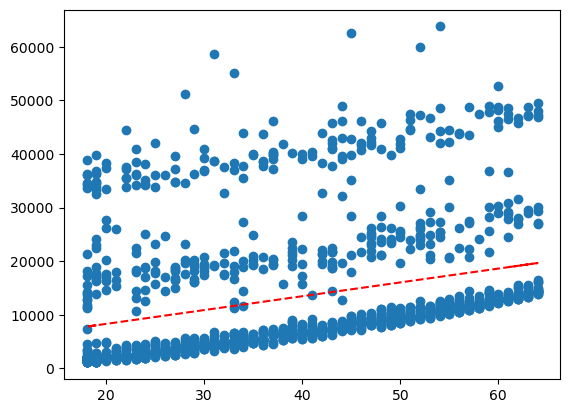

In [27]:
plt.scatter(df.Age, df.Charge)
z = np.polyfit(df.Age, df.Charge, 1)
line_function = np.poly1d(z)
plt.plot(df.Age, line_function(df.Age), "r--")
plt.show()

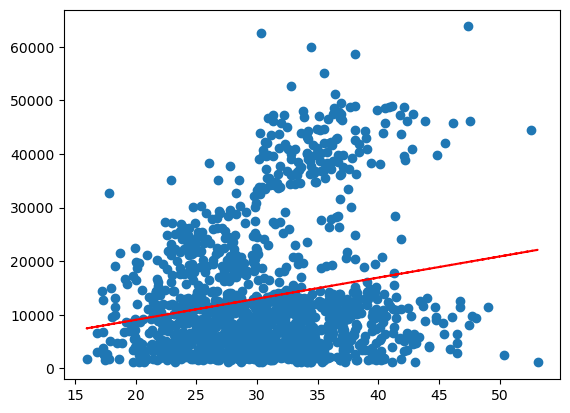

In [28]:

plt.scatter(df.BMI, df.Charge)
z = np.polyfit(df.BMI, df.Charge, 1)
line_function = np.poly1d(z)
plt.plot(df.BMI, line_function(df.BMI), "r--")
plt.show()

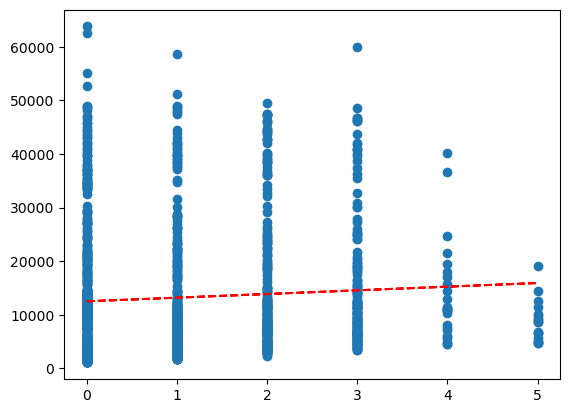

In [29]:
plt.scatter(df.NumberOfChildren, df.Charge)
z = np.polyfit(df.NumberOfChildren, df.Charge, 1)
line_function = np.poly1d(z)
plt.plot(df.NumberOfChildren, line_function(df.NumberOfChildren), "r--")
plt.show()

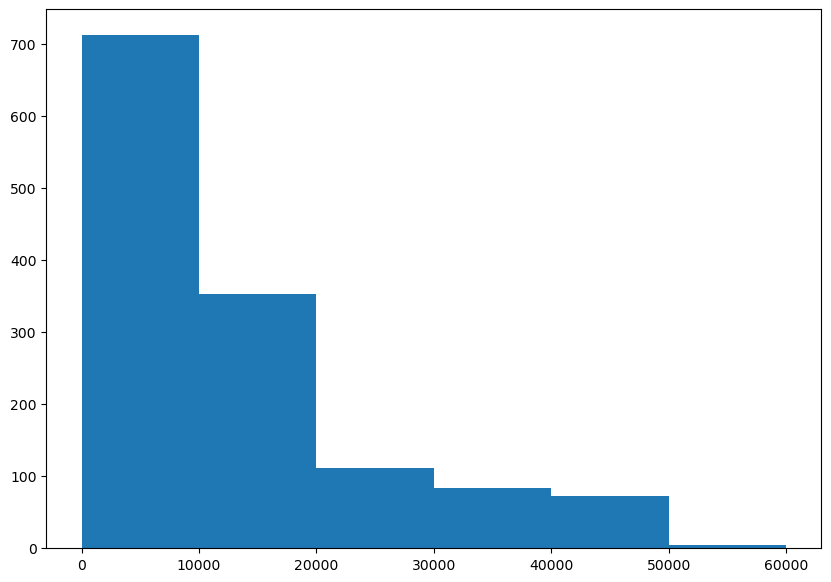

In [30]:
# Creating dataset
a = np.array(df['Charge'])

# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(a, bins = [0, 10000, 20000, 30000, 40000, 50000, 60000])
 
# Show plot
plt.show()

### Patient Population Distribution over Regions

We are going to groupby different levels of a hierarchical indexes using the level parameter

------------------------------------------


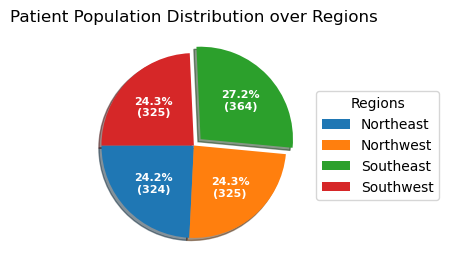

In [31]:
# define an array
arrays = [df['Region'],
          df['Smoker']]
# define hierarchical indexes
index = pd.MultiIndex.from_arrays(arrays, names=('Region', 'Smoker'))
# define a DataFrame object
#patients spread by region
df3 = pd.DataFrame({'Count': df['Age'].to_numpy().astype(np.float)
},
                index=index)
region_dist = df3.groupby(level='Region').count().reset_index()


# Add column of percentages
region_dist['percent'] = region_dist.Count.apply(lambda row: round(row * 100 / region_dist.Count.sum(), 2))
#print(df2)

#print("------------------------------------------")
#print(df3.groupby(level='Smoker').count().reset_index())
print("------------------------------------------")

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))
data = np.array(region_dist['Count'])

regions =  ['Northeast','Northwest','Southeast','Southwest']

wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"), explode=(0, 0, 0.1, 0), startangle=180,shadow=True)


ax.legend(wedges, regions,
          title="Regions",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Patient Population Distribution over Regions")

plt.show()

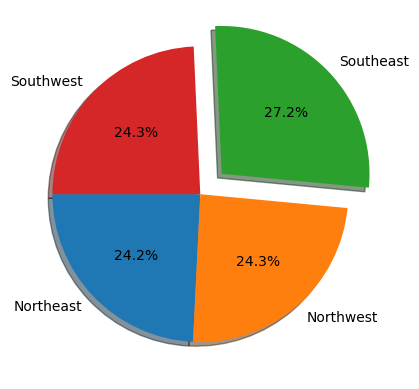

In [32]:
# data for plot
values = np.array(region_dist['Count'])
colors = [ 'red','orange','yellow','maroon']
labels = ['Northeast','Northwest','Southeast','Southwest']
data_pct = np.array(region_dist['percent'])
# add legend
#plt.legend(handles = [plt.plot(values)])

# create pie chart
#plt.pie(values,labels=labels,colors=colors,startangle=0,shadow=True)
#plt.show()

# explode the pie chart
pieexplode = [0,0,0.2,0]
# add percentage
def func_2(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%".format(pct, absolute)
pieautopct = lambda pct: func_2(pct, data_pct)
# create pie chart
plt.pie(values,labels=labels,explode=pieexplode,startangle=180,shadow=True,autopct = pieautopct )
plt.show()

### Average medical insurance costs by type of attribut

Sex     Region   
female  northeast    12953.203151
        northwest    12479.870397
        southeast    13499.669243
        southwest    11274.411264
male    northeast    13854.005374
        northwest    12354.119575
        southeast    15879.617173
        southwest    13412.883576
Name: Charge, dtype: float64
Sex     Region   
female  northeast    10591.929980
        northwest    10596.572843
        southeast    12587.261506
        southwest    10453.660658
male    northeast    11890.942381
        northwest    11569.561020
        southeast    15083.360816
        southwest    12499.550025
Name: Charge, dtype: float64


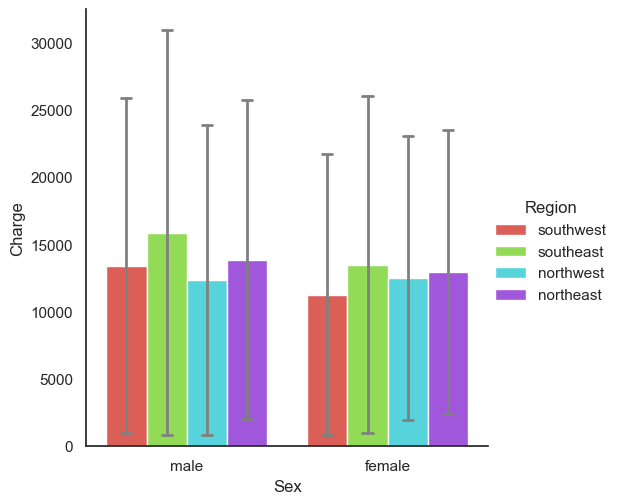

In [62]:
# define an array
arrays = [df['Region'],
          df['Smoker']]
# define hierarchical indexes
index = pd.MultiIndex.from_arrays(arrays, names=('Region', 'Smoker'))
# define a DataFrame object
df2 = pd.DataFrame({'Insurance Cost': df['Charge'].to_numpy().astype(np.float)
},
                index=index)
#using the level parameter to display the average medical insurance cost

#print(df2.groupby(level=0).mean().reset_index())
#print("------------------------------------------")
#print(df2.groupby(level='Smoker').mean().reset_index())


arrays = [df['Sex'],
          df['NumberOfChildren'], df['Smoker'], df['Region']]
index = pd.MultiIndex.from_arrays(arrays, names=('Sex', 'NumberOfChildren', 'Smoker', 'Region'))
df1 = pd.DataFrame({'Insurance Cost': df['Charge'].to_numpy().astype(np.float)
},
                index=index)
#print(df1)
#print(df1.groupby(level=0).mean().reset_index())
#print("------------------------------------------")
#print(df1.groupby(level='NumberOfChildren').mean().reset_index())
#print("------------------------------------------")
#df1.groupby(level='Region').mean().reset_index()

sns.set_theme(style="white")
sns.catplot(x="Sex", y="Charge", hue="Region", kind="bar", data=df,
           palette = 'hls',
            order = ['male', 'female'],  
            capsize = 0.05,             
            saturation = 8,             
            errcolor = 'gray', errwidth = 2,  
            ci = 'sd'  )
print(df.groupby(['Sex', 'Region']).mean()['Charge'])
print(df.groupby(['Sex', 'Region']).std()['Charge'])
plt.show()

------------------------------------------


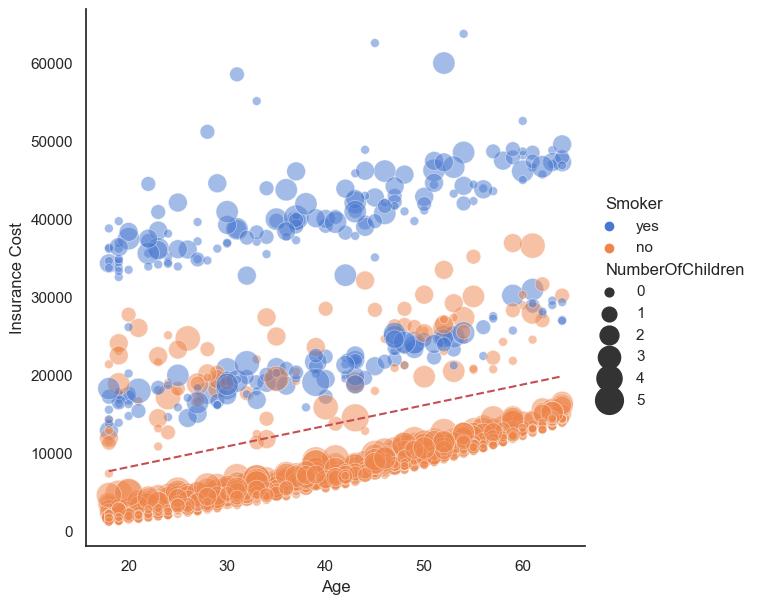

In [51]:
arrays = [df['Smoker'],
          df['Age'], df['NumberOfChildren']]
index = pd.MultiIndex.from_arrays(arrays, names=('Smoker', 'Age', 'NumberOfChildren'))
df2 = pd.DataFrame({'Insurance Cost': df['Charge'].to_numpy().astype(np.float)
},
                index=index)
#print(df2)
avg_bmi_level = df2.groupby(level=0).mean().reset_index()
avg_age_level = df2.groupby(level='Age').mean().reset_index()
avg_numchild_level= df2.groupby(level='NumberOfChildren').mean().reset_index()
#print(avg_bmi_level)
#print("------------------------------------------")
#print(avg_age_level)
#print("------------------------------------------")
#print(avg_numchild_level)
print("------------------------------------------")

sns.set_theme(style="white")

sns.relplot(x="Age", y="Insurance Cost", hue="Smoker", size="NumberOfChildren",
           sizes=(40, 400), alpha=.5, palette="muted",
           height=6, data=df2)
z = np.polyfit(avg_age_level['Age'], avg_age_level['Insurance Cost'], 1)
line_function = np.poly1d(z)
plt.plot(avg_age_level['Age'], line_function(avg_age_level['Age']), "r--")
plt.show()


------------------------------------------


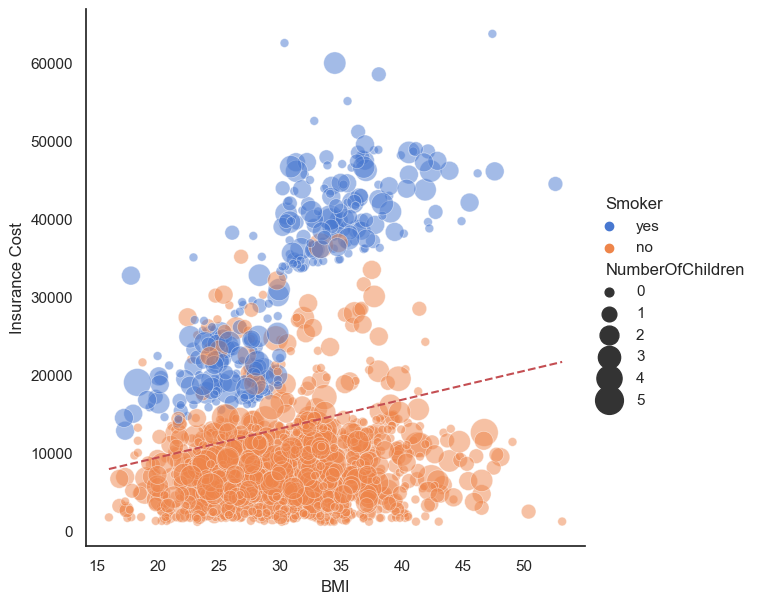

In [63]:
arrays = [df['Smoker'],
          df['BMI'], df['NumberOfChildren']]
index = pd.MultiIndex.from_arrays(arrays, names=('Smoker', 'BMI', 'NumberOfChildren'))
df2 = pd.DataFrame({'Insurance Cost': df['Charge'].to_numpy().astype(np.float)
},
                index=index)
#print(df2)
avg_bmi_level = df2.groupby(level=0).mean().reset_index()
avg_bmi_level = df2.groupby(level='BMI').mean().reset_index()
avg_numchild_level= df2.groupby(level='NumberOfChildren').mean().reset_index()
#print(avg_bmi_level)
#print("------------------------------------------")
#print(avg_bmi_level)
#print("------------------------------------------")
#print(avg_numchild_level)
print("------------------------------------------")

sns.set_theme(style="white")

sns.relplot(x="BMI", y="Insurance Cost", hue="Smoker", size="NumberOfChildren",
           sizes=(40, 400), alpha=.5, palette="muted",
           height=6, data=df2)
z = np.polyfit(avg_bmi_level['BMI'], avg_bmi_level['Insurance Cost'], 1)
line_function = np.poly1d(z)
plt.plot(avg_bmi_level['BMI'], line_function(avg_bmi_level['BMI']), "r--")
plt.show()

------------------------------------------


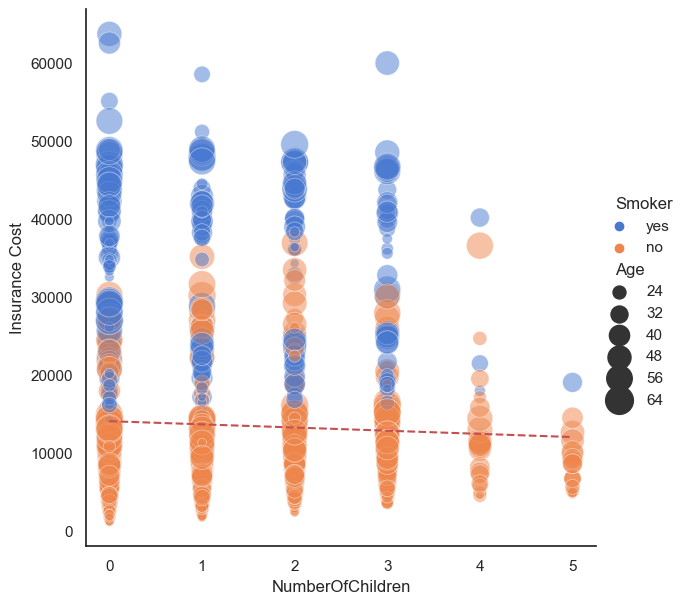

In [65]:
arrays = [df['Smoker'],
          df['Age'], df['NumberOfChildren']]
index = pd.MultiIndex.from_arrays(arrays, names=('Smoker', 'Age', 'NumberOfChildren'))
df2 = pd.DataFrame({'Insurance Cost': df['Charge'].to_numpy().astype(np.float)
},
                index=index)
#print(df2)
avg_bmi_level = df2.groupby(level=0).mean().reset_index()
avg_age_level = df2.groupby(level='Age').mean().reset_index()
avg_numchild_level= df2.groupby(level='NumberOfChildren').mean().reset_index()
#print(avg_bmi_level)
#print("------------------------------------------")
#print(avg_age_level)
#print("------------------------------------------")
#print(avg_numchild_level)
print("------------------------------------------")

sns.set_theme(style="white")

sns.relplot(x="NumberOfChildren", y="Insurance Cost", hue="Smoker", size="Age",
           sizes=(40, 400), alpha=.5, palette="muted",
           height=6, data=df2)
z = np.polyfit(avg_numchild_level['NumberOfChildren'], avg_numchild_level['Insurance Cost'], 1)
line_function = np.poly1d(z)
plt.plot(avg_numchild_level['NumberOfChildren'], line_function(avg_numchild_level['NumberOfChildren']), "r--")
plt.show()

------------------------------------------


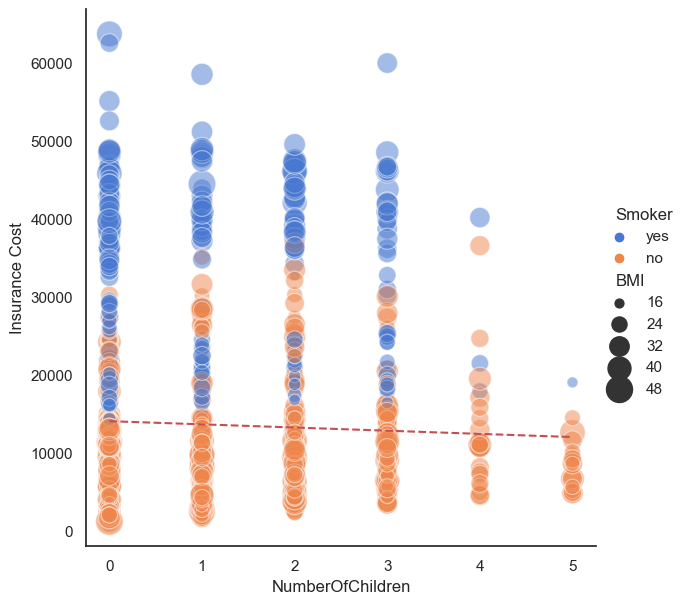

In [67]:
arrays = [df['Smoker'],
          df['Age'], df['NumberOfChildren'], df['BMI']]
index = pd.MultiIndex.from_arrays(arrays, names=('Smoker', 'Age', 'NumberOfChildren', 'BMI'))
df2 = pd.DataFrame({'Insurance Cost': df['Charge'].to_numpy().astype(np.float)
},
                index=index)
#print(df2)
avg_bmi_level = df2.groupby(level=0).mean().reset_index()
avg_age_level = df2.groupby(level='Age').mean().reset_index()
avg_numchild_level= df2.groupby(level='NumberOfChildren').mean().reset_index()
#print(avg_bmi_level)
#print("------------------------------------------")
#print(avg_age_level)
#print("------------------------------------------")
#print(avg_numchild_level)
print("------------------------------------------")

sns.set_theme(style="white")

sns.relplot(x="NumberOfChildren", y="Insurance Cost", hue="Smoker", size="BMI",
           sizes=(40, 400), alpha=.5, palette="muted",
           height=6, data=df2)
z = np.polyfit(avg_numchild_level['NumberOfChildren'], avg_numchild_level['Insurance Cost'], 1)
line_function = np.poly1d(z)
plt.plot(avg_numchild_level['NumberOfChildren'], line_function(avg_numchild_level['NumberOfChildren']), "r--")
plt.show()